# Algortimos genéticos

Optimización de función de rastrigin.

- Función de fitness
- Selección de padres: Ruleta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import math

In [2]:
def pop_indiv(bit_len=22):
    return ''.join([str(random.randint(0,1))for i in range(bit_len)])
    #return ''.join(['1' if bit==True else '0' for bit in bitarray(bit_len)])

def pop_gener(pop_size, len_ind_bits=22):
    #Generador de poblaciones al azar
    return [pop_indiv(len_ind_bits) for i in xrange(pop_size)]#[bitarray(len_ind_bits) for indiv in xrange(N_pob)]


def decode_indiv(indiv):
    c_param=(int(indiv[:11],2)-1024)/200.0
    sigma_param= (int(indiv[11:],2)-1024)/200.0
    return [c_param, sigma_param]

def rastrigin(X_array, A=10, m=0):
    n=len(X_array)
    y=A*n+(sum([(x_val**2)-(A*math.cos(2*math.pi*x_val))for x_val in X_array]))
    return y

def fit_vector(population):
    fit_rast=[rastrigin(decode_indiv(ind)) for ind in population]
    #prop_2=[1-(rast_pt/sum(fit_rast)) for rast_pt in fit_rast]
    max_arg=max(fit_rast)
    prop_2=[1-(rast_pt/max_arg) for rast_pt in fit_rast]
    #fit_vec=[(p2/sum(prop_2)) for p2 in prop_2]
    #return fit_vec
    return prop_2

def selec_rulet(vec_fitness, n):
    # Devueleve una cantidad n de individuos a partir de la probabilidad proporcional a su fitness (mayor fitness, mayor probabilidad)
    elecs=[]
    probs=[float(p_i)/sum(vec_fitness) for p_i in vec_fitness]
    for i_num in xrange(n):
        r_num=random.random()
        cumsum=[sum(probs[:i+1]) for i in xrange(len(probs))]
        elec=None
        for i_sum in enumerate(cumsum):
            if r_num <= i_sum[1]:
                elec=i_sum[0]# devuleve el índice del seleccionado
                break
        elecs.append(elec)
    return elecs

def mutation(indiv, n_mutations=4):
    code=list(indiv)
    for i in xrange(n_mutations):
        loci=random.randint(0,len(indiv)-1)
        code[loci]=str(abs(int(code[loci])-1))
    return(''.join(code))

def fili(population,fits_popul,n_mutations=4):    
    ith_parents=selec_rulet(fits_popul, 2)
    parents=[population[ith] for ith in ith_parents]
    child_1=parents[0][:5]+parents[1][5:11]+parents[0][11:16]+parents[1][16:]
    child_2=parents[1][:5]+parents[0][5:11]+parents[1][11:16]+parents[0][16:]
    return ([mutation(child_1,n_mutations),mutation(child_2,n_mutations)])



In [3]:
def experim(iteraciones=100, popul_size=500):
    pars_1=pop_gener(popul_size)
    evolution=[]
    fitness_population=fit_vector(pars_1)
    evolution=[[len(set(pars_1)),
                max(fitness_population),
                pars_1[fitness_population.index(max(fitness_population))],
                round(np.mean(fitness_population),2),
                round(np.std(fitness_population),2)
               ]]#propiedades de las poblaciones a lo largo de las generaciones

    for i in xrange(iteraciones):
        offsp=[]
        for i in range(len(pars_1)/2):
            offsp.extend(fili(pars_1,fitness_population))
        inds_popul=len(set(offsp))
        fintess_offspring=fit_vector(offsp)
        best_fitness=max(fintess_offspring)
        best_indiv=offsp[fintess_offspring.index(max(fintess_offspring))]
        avg_fit=round(np.mean(fintess_offspring),2)
        desvest_fit=round(np.std(fintess_offspring),2)
        evolution.append([inds_popul,best_fitness,best_indiv,avg_fit,desvest_fit])
        # combinar  parents y offsp, y seleccionar.
        generations_AB=pars_1+offsp
        fitness_AB=fit_vector(generations_AB)
        next_gen_selec=selec_rulet(fitness_AB,len(pars_1))
        next_gen=[generations_AB[selected]for selected in next_gen_selec]
        pars_1=next_gen

    evolution=np.array(evolution)
    evolution[:,3:]=evolution[:,3:].astype(float)
    return evolution

# TESTCODE


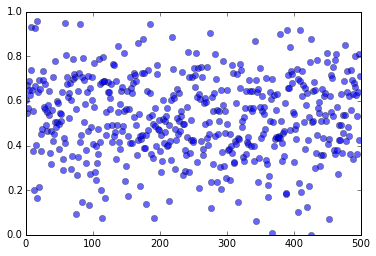

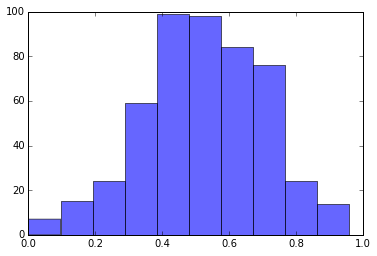

In [4]:
pop_s=500
# population_1=[pop_indiv() for i in xrange(pop_size)]
# fit_rast=[rastrigin(decode_indiv(ind)) for ind in population_1]
# prop_2=[1-(rast_pt/sum(fit_rast)) for rast_pt in fit_rast]
# fit_vec=[(p2/sum(prop_2)) for p2 in prop_2]

f_vc=fit_vector(pop_gener(pop_s))
plt.plot(f_vc,"o", alpha=0.6)
plt.show()
plt.hist(f_vc,alpha=0.6)
plt.show()

In [5]:
### Parámetros
iteraciones=1000
pars_1=pop_gener(200)
mutaciones=1

evolution=[]
fitness_population=fit_vector(pars_1)
evolution=[[len(set(pars_1)),
            max(fitness_population),
            pars_1[fitness_population.index(max(fitness_population))],
            round(np.mean(fitness_population),2),
            round(np.std(fitness_population),2)
           ]]#propiedades de las poblaciones a lo largo de las generaciones

for i in xrange(iteraciones):
    offsp=[]
    for i in range(len(pars_1)/2):
        offsp.extend(fili(pars_1,fitness_population,mutaciones))
    inds_popul=len(set(offsp))
    fintess_offspring=fit_vector(offsp)
    best_fitness=max(fintess_offspring)
    best_indiv=offsp[fintess_offspring.index(max(fintess_offspring))]
    avg_fit=round(np.mean(fintess_offspring),2)## Cambiar por moda
    desvest_fit=round(np.std(fintess_offspring),2)
    evolution.append([inds_popul,best_fitness,best_indiv,avg_fit,desvest_fit])
    # combinar  parents y offsp, y seleccionar.
    generations_AB=pars_1+offsp
    fitness_AB=fit_vector(generations_AB)
    next_gen_selec=selec_rulet(fitness_AB,len(pars_1))
    next_gen=[generations_AB[selected]for selected in next_gen_selec]
    pars_1=next_gen

evolution=np.array(evolution)
evolution[:,3:]=evolution[:,3:].astype(float)


/opt/anaconda/envs/mindlabenv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


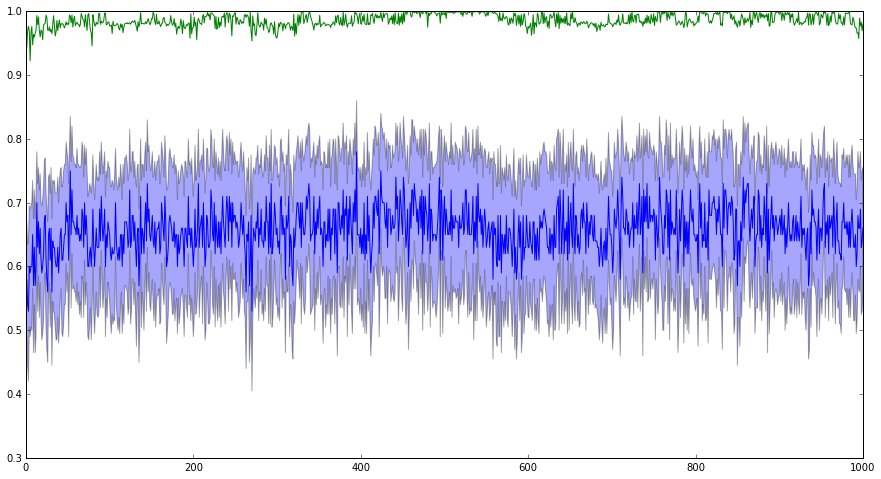

In [6]:
plt.figure(figsize=(15,8))
plt.fill_between(xrange(len(evolution[:,3])),evolution[:,3].astype(float)+evolution[:,4].astype(float)*0.5,
                 evolution[:,3].astype(float)-evolution[:,4].astype(float)*0.5,alpha=.35)
plt.plot(xrange(len(evolution[:,2])),evolution[:,3].astype(float))
plt.plot(xrange(len(evolution[:,2])),evolution[:,1].astype(float))
plt.show()

In [ ]:
# print (len(pars_1))
# offsp_2=[]
# for i in range(len(pars_1)/2):
#     offsp_2.extend(fili(pars_1,fitness_population))
# print (len(pars_1+offsp_2))

# generations_AB=pars_1+offsp
# fitness_AB=fit_vector(generations_AB)
# next_gen_selec=selec_rulet(fitness_AB,len(pars_1))
# next_gen=[generations_AB[selected]for selected in next_gen_selec]
# next_gen

# ndv=["a","b","c","d","e"]
# ft_ndv=[.1,.15,.2,.25,.3]
# lcs=selec_rulet(ft_ndv,100000)
# vecs_selected=[ndv[lctd] for lctd in lcs]
# pd.Series(vecs_selected).value_counts()
#### RULETA FUNCIONA BIEN!!!!


In [36]:
print(evolution[:,3])

['0.48' '0.53' '0.45' ..., '0.5' '0.59' '0.57']


In [6]:
pop_size
population_test=[pop_indiv() for i in xrange(pop_size)]
f_vec_test=fit_vector(population_test)

gen_next=[]
for i in range (len(population)/2):
    gen_next.extend(fili(population_test,f_vec_test))

gen_next

['1111101110111001111101',
 '0011101101111000110110',
 '0001010010100101000100',
 '1100101111111000111001',
 '0100000111011011001100',
 '1110001000100101001011',
 '0101110101101011011001',
 '1010100110000010110110',
 '1000110000110011100010',
 '0001100101001010011000',
 '0101001101100101011001',
 '1000010000010010111001',
 '1011111001010000001100',
 '0111000110001011101011',
 '1010000111000110010101',
 '0110101110101101101111',
 '1000000111101010101100',
 '1010011101100101011100',
 '1011100000001011001000',
 '1001101011101110100000']

In [ ]:
def fili(population,fits_popul,n_mutations=4):    
    ith_parents=selec_rulet(fits_popul, 2)
    parents=[population[ith] for ith in ith_parents]
    child_1=parents[0][:5]+parents[1][5:11]+parents[0][11:16]+parents[1][16:]
    child_2=parents[1][:5]+parents[0][5:11]+parents[1][11:16]+parents[0][16:]
    return ([mutation(child_1,n_mutations),mutation(child_2,n_mutations)])

In [ ]:
def mutation(indiv, n_mutations):
    code=list(indiv)
    for i in xrange(n_mutations):
        loci=random.randint(0,len(indiv)-1)
        code[loci]=str(abs(int(code[loci])-1))
    return(''.join(code))

In [4]:
guy=pop_indiv()
print(guy)
print(mutation(guy,0))

0100101100110001111000
0100101100110001111000


In [5]:
random.randint(0,22)

8

In [ ]:
ith_parents=selec_rulet(fit_vec, 2)
parents=[population_1[ith] for ith in ith_parents]
print(np.array(parents))

In [ ]:
child_1=parents[0][:5]+parents[1][5:11]+parents[0][11:16]+parents[1][16:]
child_2=parents[1][:5]+parents[0][5:11]+parents[1][11:16]+parents[0][16:]
print(child_1)
print(child_2)

In [ ]:
rastrigin(parents[0])


rastrigin(decode_indiv(child_1))

In [ ]:
#print(np.array(fit_rast))
plt.plot(fit_rast,"o", alpha=0.6)
plt.show()
prop_3=[(rast_pt/sum(fit_rast)) for rast_pt in fit_rast]
plt.plot(prop_3,"o", alpha=0.6)
plt.show()
prop_2=[1-(rast_pt/sum(fit_rast)) for rast_pt in fit_rast]
fit_vec=[(p2/sum(prop_2)) for p2 in prop_2]
#print(sum(prop_1))
#print(np.array(prop_1))
plt.plot(fit_vec,"o", alpha=0.6)
plt.show()

In [ ]:
1024/200.0

In [ ]:
pop_indiv()

In [ ]:
#indiv="001110101011101011011101101011100101010"
#indiv="0000000000011111111111"
#indiv="1111111111100000000000"
#indiv="0000000000100000000001"
#indiv="0000111111100001111111"
# indiv="1000000000010000000000"
# indiv=indiv[:22]

print (bitarray(22))
indiv_a=bitarray(22)
print (indiv)
indiv=''.join(["1" if bit==True else "0" for bit in indiv_a])
print (int(indiv[:11],2))
print (int(indiv[11:],2))

c_param_bit=10**((int(indiv[:11],2)-1024)/100.0)
sigma_param_bit= 3**((int(indiv[11:],2)-1024)/100.0)

print (c_param_bit, sigma_param_bit)
print (rastrigin([c_param_bit,sigma_param_bit]))


In [ ]:
fit_indiv(indiv)

In [ ]:
#c_param=10**((int(indiv[:11],2)-1024)/100.0)
#sigma_param= 3**((int(indiv[11:],2)-1024)/100.0)
svr = svm.SVC(kernel='rbf', C=1, gamma=1)
svr.fit(X_train_w2v, y_train_w2v)
y_est = svr.predict(X_test_w2v)
f1_svr=f1(y_test_w2v, y_est, average='weighted')
f1_svr

In [ ]:
fit_indiv(pop_indiv())

In [9]:
2048**2

4194304

In [13]:
aaaaa=[999,2,1,3,4,5,5,7,9,8,5,2,31,63,4,6,7]

In [14]:
aaaaa.index(max(aaaaa))

0